In [1]:
import pandas as pd
import numpy as np

In [3]:
# Read the data
df = pd.read_csv('data/cleaned_data_for_modeling.csv')


In [4]:
# Extract the specified columns
power = df['power_eu_3']
irradiance_site = df['irradiance_site']
temperature_site = df['temperature_site']
humidity_site = df['humidity_site']

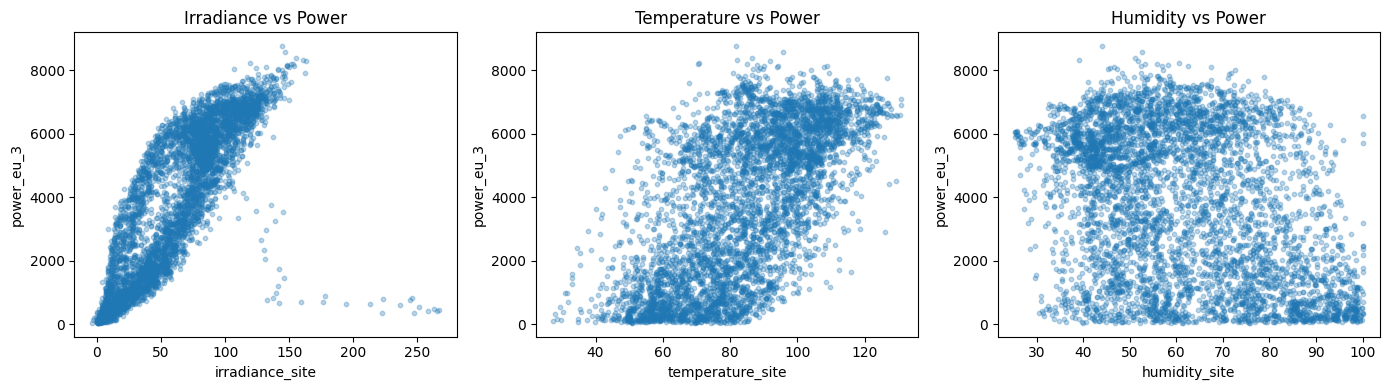

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Irradiance vs power
axes[0].scatter(irradiance_site, power, alpha=0.3, s=10)
axes[0].set_xlabel('irradiance_site')
axes[0].set_ylabel('power_eu_3')
axes[0].set_title('Irradiance vs Power')

# Temperature vs power
axes[1].scatter(temperature_site, power, alpha=0.3, s=10)
axes[1].set_xlabel('temperature_site')
axes[1].set_ylabel('power_eu_3')
axes[1].set_title('Temperature vs Power')

# Humidity vs power
axes[2].scatter(humidity_site, power, alpha=0.3, s=10)
axes[2].set_xlabel('humidity_site')
axes[2].set_ylabel('power_eu_3')
axes[2].set_title('Humidity vs Power')

plt.tight_layout()
plt.show()

In [9]:
# GAM: power (output) ~ s(irradiance_site) + s(temperature_site) + s(humidity_site)
from pygam import LinearGAM, s

X = df[['irradiance_site', 'temperature_site', 'humidity_site']].values
y = power.values

# Fit GAM with smooth terms (splines) for each predictor
gam = LinearGAM(s(0) + s(1) + s(2)).fit(X, y)
print(gam.summary())
print("\nCoefficients (spline basis):")
print(gam.coef_)
# Coefficients by term (each smooth has multiple basis coefficients)
feat_names = ['irradiance_site', 'temperature_site', 'humidity_site']
for i, name in enumerate(feat_names):
    n_coef = gam.n_splines[i]
    start = sum(gam.n_splines[:i])
    coefs = gam.coef_[start:start + n_coef]
    print(f"\n{name}: {coefs}")

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       43.67
Link Function:                     IdentityLink Log Likelihood:                                 -42698.432
Number of Samples:                         5096 AIC:                                             85486.204
                                                AICc:                                           85487.0119
                                                GCV:                                          1136941.1094
                                                Scale:                                           1058.0251
                                                Pseudo R-Squared:                                      0.8
Feature Function                  Lam

C:\Users\nhphuong\AppData\Local\Temp\ipykernel_104768\2508066419.py:9: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


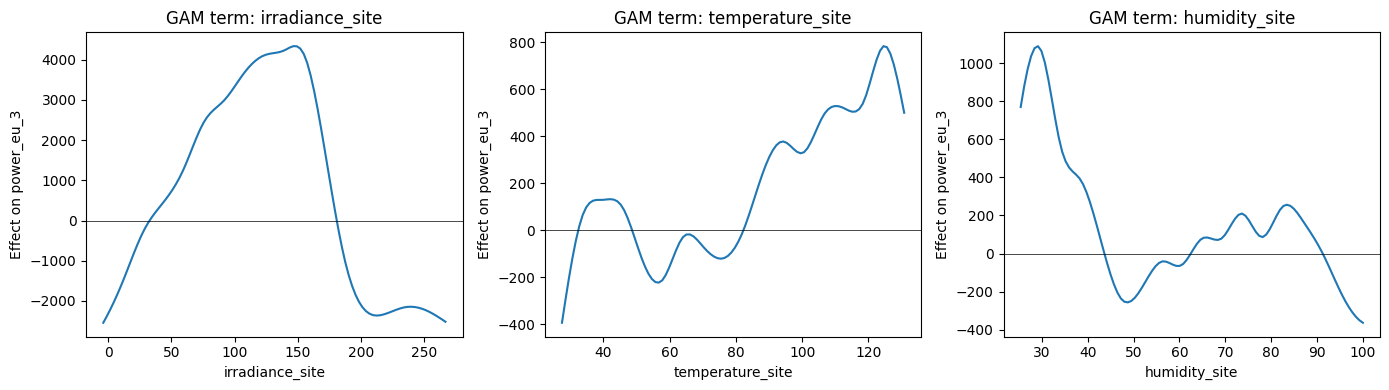

In [8]:
# Partial dependence plots: effect of each feature on power
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
titles = ['irradiance_site', 'temperature_site', 'humidity_site']
for i, ax in enumerate(axes):
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i, X=XX)
    ax.plot(XX[:, i], pdep)
    ax.set_xlabel(titles[i])
    ax.set_ylabel('Effect on power_eu_3')
    ax.set_title(f'GAM term: {titles[i]}')
    ax.axhline(0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()